<a href="https://colab.research.google.com/github/sachinthadilshann/UdemyMLProjects/blob/main/Multiclass_image_classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset:- https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [112]:
from tensorflow.keras.datasets import fashion_mnist

In [113]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [114]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [115]:
(np.min(x_train)),(np.max(x_train))

(0, 255)

In [116]:
(np.mean(x_train))

72.94035223214286

In [117]:
(np.max(y_train)),(np.min(y_train))

(9, 0)

In [118]:
class_names = ['0 T-shirt/top',
               '1 Trouser',
               '2 Pullover',
               '3 Dress',
               '4 Coat',
               '5 Sandal',
               '6 Shirt',
               '7 Sneaker',
               '8 Bag',
               '9 Ankle boot']
class_names

['0 T-shirt/top',
 '1 Trouser',
 '2 Pullover',
 '3 Dress',
 '4 Coat',
 '5 Sandal',
 '6 Shirt',
 '7 Sneaker',
 '8 Bag',
 '9 Ankle boot']

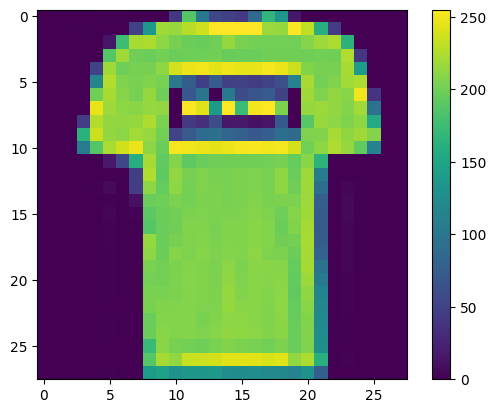

In [119]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()


In [120]:
y_train[1]

0

In [121]:
x_train = x_train / 255.0
x_test = x_test / 255.0

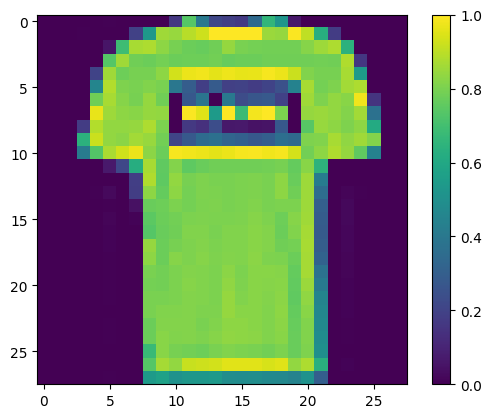

In [122]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [123]:
#flattening the dataset
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [124]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [125]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [126]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layer
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [128]:
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7198 - sparse_categorical_accuracy: 0.7489
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4239 - sparse_categorical_accuracy: 0.8469
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3868 - sparse_categorical_accuracy: 0.8600
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3635 - sparse_categorical_accuracy: 0.8685
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3489 - sparse_categorical_accuracy: 0.8721
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8727
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3313 - sparse_categorical_accuracy: 0.8773
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8797
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3154 - sparse_categorical_accuracy: 0.8845
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━

In [129]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3369 - sparse_categorical_accuracy: 0.8838


In [130]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8844000101089478


In [131]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [132]:
predictions = np.argmax(y_pred, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [133]:
y_pred[110].argmax()

2

In [134]:
y_test[110]

2

In [135]:
print(class_names[predictions[110]])

2 Pullover


Text(95.72222222222221, 0.5, 'Truth')

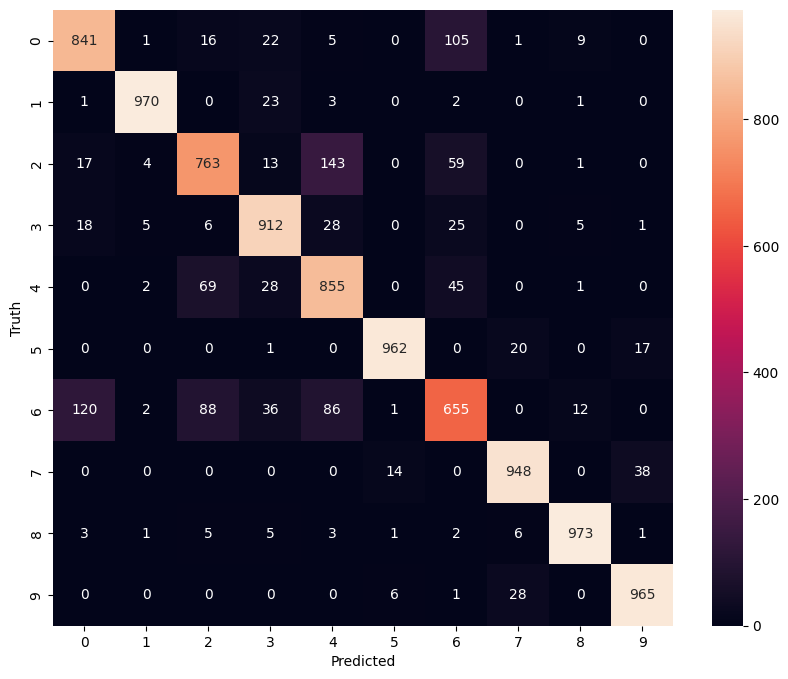

In [136]:

from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [137]:
acc_cm = accuracy_score(y_test, predictions)
print(f'Accuracy of confusion matrix is {acc_cm*100}%')

Accuracy of confusion matrix is 88.44%
